<a href="https://colab.research.google.com/github/aryan-at-ul/vision_related_projects/blob/main/patch_graph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

390 (1440, 2560, 3)


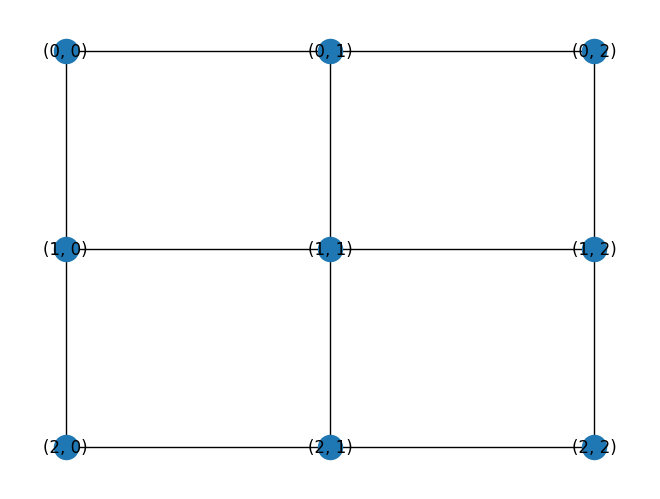

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import cv2
import matplotlib.pyplot as plt

# Generate an example image
img = np.random.rand(300, 300)
img = cv2.imread('/content/johnwick.jpg')
# Divide the image into 9 patches of equal size
patch_size = (100, 100)
patches = [img[i:i+patch_size[0], j:j+patch_size[1]] for i in range(0, img.shape[0], patch_size[0]) for j in range(0, img.shape[1], patch_size[1])]

print(len(patches),img.shape)
# Assign each patch a unique identifier based on its location
patch_ids = [(i, j) for i in range(3) for j in range(3)]

# Create a graph with 9 vertices, one for each patch, and no edges
G = nx.Graph()
G.add_nodes_from(patch_ids)

# Add edges to the graph connecting adjacent patches
for i in range(3):
    for j in range(3):
        if i > 0:
            G.add_edge((i, j), (i-1, j))
        if i < 2:
            G.add_edge((i, j), (i+1, j))
        if j > 0:
            G.add_edge((i, j), (i, j-1))
        if j < 2:
            G.add_edge((i, j), (i, j+1))

# Visualize the graph
pos = {patch_id: np.array([patch_id[1], 2-patch_id[0]]) for patch_id in patch_ids}
nx.draw(G, pos=pos, with_labels=True)
plt.show()


In [6]:
image_list = patches
num_images = len(image_list)

fig, axs = plt.subplots(nrows=256, ncols=14, figsize=(100, 100))
axs = axs.flatten()

for i in range(num_images):
    img = image_list[i]
    # img = img.reshape(10, 10, 3)
    axs[i].imshow(img)
    axs[i].axis('off')

plt.tight_layout()
plt.show()

KeyboardInterrupt: ignored

Error in callback <function _draw_all_if_interactive at 0x7f09de799d80> (for post_execute):


KeyboardInterrupt: ignored

Error in callback <function flush_figures at 0x7f09de799000> (for post_execute):


KeyboardInterrupt: ignored

In [5]:
import cv2
import numpy as np
import networkx as nx

def image_to_patches(img, patch_size):
    h, w, _ = img.shape
    num_patches_horizontal = w // patch_size
    num_patches_vertical = h // patch_size

    patches = []

    for y in range(num_patches_vertical):
        for x in range(num_patches_horizontal):
            patch = img[y * patch_size:(y + 1) * patch_size, x * patch_size:(x + 1) * patch_size]
            patches.append(patch)

    return patches
    

def create_patch_graph(patches, num_patches_horizontal, num_patches_vertical):
    G = nx.Graph()

    for i, patch in enumerate(patches):
        G.add_node(i, image=patch)

    # Connect adjacent patches with edges
    for y in range(num_patches_vertical):
        for x in range(num_patches_horizontal):
            node_id = y * num_patches_horizontal + x

            # Connect to the right neighbor
            if x + 1 < num_patches_horizontal:
                G.add_edge(node_id, node_id + 1)

            # Connect to the bottom neighbor
            if y + 1 < num_patches_vertical:
                G.add_edge(node_id, node_id + num_patches_horizontal)

    return G

# Load an image
img = cv2.imread('/content/johnwick.jpg')

# Define patch size
patch_size = 300

# Convert the image into patches
patches = image_to_patches(img, patch_size)

# Get the number of patches in horizontal and vertical directions
num_patches_horizontal = img.shape[1] // patch_size
num_patches_vertical = img.shape[0] // patch_size

# Create a graph with patches as nodes and connect adjacent patches
patch_graph = create_patch_graph(patches, num_patches_horizontal, num_patches_vertical)

# Access a patch (node) in the graph
node_id = 0
patch_node = patch_graph.nodes[node_id]['image']


In [6]:
print(img.shape)

(1440, 2560, 3)


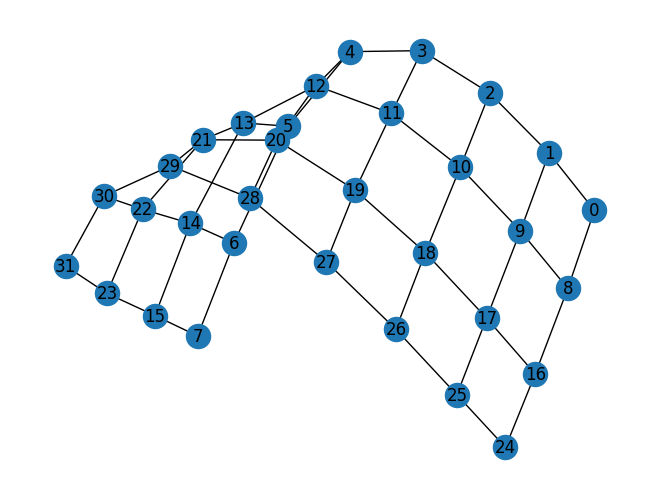

In [7]:
nx.draw(patch_graph, with_labels=True)
plt.show()

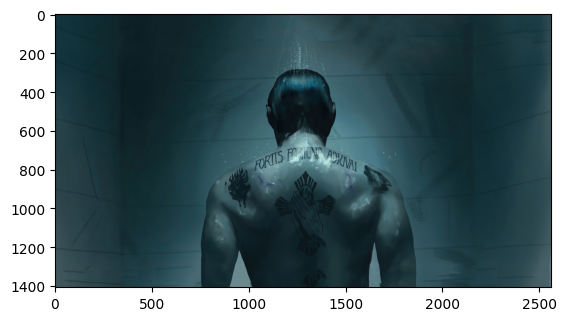

In [3]:
import cv2
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

def image_to_patches(img, patch_size):
    h, w, _ = img.shape
    num_patches_horizontal = w // patch_size
    num_patches_vertical = h // patch_size

    patches = []

    for y in range(num_patches_vertical):
        for x in range(num_patches_horizontal):
            patch = img[y * patch_size:(y + 1) * patch_size, x * patch_size:(x + 1) * patch_size]
            patches.append(patch)

    return patches

def create_patch_graph(patches, num_patches_horizontal, num_patches_vertical):
    G = nx.Graph()

    for i, patch in enumerate(patches):
        G.add_node(i, image=patch)

    # Connect adjacent patches with edges
    for y in range(num_patches_vertical):
        for x in range(num_patches_horizontal):
            node_id = y * num_patches_horizontal + x

            # Connect to the right neighbor
            if x + 1 < num_patches_horizontal:
                G.add_edge(node_id, node_id + 1)

            # Connect to the bottom neighbor
            if y + 1 < num_patches_vertical:
                G.add_edge(node_id, node_id + num_patches_horizontal)

    return G

def reconstruct_image(G, num_patches_horizontal, num_patches_vertical, patch_size):
    reconstructed_image = np.zeros((num_patches_vertical * patch_size, num_patches_horizontal * patch_size, 3), dtype=np.uint8)

    for y in range(num_patches_vertical):
        for x in range(num_patches_horizontal):
            node_id = y * num_patches_horizontal + x
            patch = G.nodes[node_id]['image']
            reconstructed_image[y * patch_size:(y + 1) * patch_size, x * patch_size:(x + 1) * patch_size] = patch

    return reconstructed_image


def mosaic_from_patches(patches, mosaic_rows, mosaic_cols, patch_size):
    mosaic_image = np.zeros((mosaic_rows * patch_size, mosaic_cols * patch_size, 3), dtype=np.uint8)

    for i, patch in enumerate(patches):
        y, x = divmod(i, mosaic_cols)
        mosaic_image[y * patch_size:(y + 1) * patch_size, x * patch_size:(x + 1) * patch_size] = patch

    return mosaic_image
# Load an image
img = cv2.imread('/content/johnwick.jpg')

# Define patch size
patch_size = 64

# Convert the image into patches
patches = image_to_patches(img, patch_size)

# Get the number of patches in horizontal and vertical directions
num_patches_horizontal = img.shape[1] // patch_size
num_patches_vertical = img.shape[0] // patch_size

# Create a graph with patches as nodes and connect adjacent patches
patch_graph = create_patch_graph(patches, num_patches_horizontal, num_patches_vertical)

# Reconstruct the image from the patch graph
reconstructed_img = reconstruct_image(patch_graph, num_patches_horizontal, num_patches_vertical, patch_size)

# Convert the image from BGR to RGB
reconstructed_img_rgb = cv2.cvtColor(reconstructed_img, cv2.COLOR_BGR2RGB)

# Display the reconstructed image
plt.imshow(reconstructed_img_rgb)
plt.show()


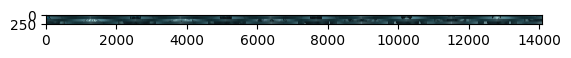

In [4]:
mosaic_rows = 4
mosaic_cols = (len(patches) + mosaic_rows - 1) // mosaic_rows
mosaic_img = mosaic_from_patches(patches, mosaic_rows, mosaic_cols, patch_size)

# Convert the mosaic image from BGR to RGB
mosaic_img_rgb = cv2.cvtColor(mosaic_img, cv2.COLOR_BGR2RGB)

# Display the mosaic image
plt.imshow(mosaic_img_rgb)
plt.show()

In [5]:
def reconstruct_image_grid(patches, num_patches_horizontal, num_patches_vertical, patch_size, gap=2):
    gap_size = (gap - 1) // 2
    h = num_patches_vertical * (patch_size + gap_size * 2)
    w = num_patches_horizontal * (patch_size + gap_size * 2)

    reconstructed_image = np.zeros((h, w, 3), dtype=np.uint8)

    for y in range(num_patches_vertical):
        for x in range(num_patches_horizontal):
            idx = y * num_patches_horizontal + x
            patch = patches[idx]
            y_start = y * (patch_size + gap_size * 2) + gap_size
            x_start = x * (patch_size + gap_size * 2) + gap_size
            reconstructed_image[y_start:y_start + patch_size, x_start:x_start + patch_size] = patch

    return reconstructed_image

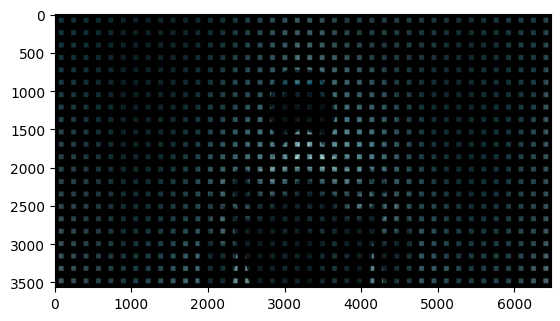

In [7]:
# Reconstruct the image grid with gaps between patches
gap = 100
reconstructed_img_grid = reconstruct_image_grid(patches, num_patches_horizontal, num_patches_vertical, patch_size, gap)

# Convert the reconstructed image from BGR to RGB
reconstructed_img_grid_rgb = cv2.cvtColor(reconstructed_img_grid, cv2.COLOR_BGR2RGB)

# Display the reconstructed image grid
plt.imshow(reconstructed_img_grid_rgb)
plt.show()